In [ ]:
\from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/MLDL-Project/Code/Codebase_inUse/data/idda"

Mounted at /content/drive
/content/drive/MyDrive/MLDL-Project/Code/Codebase_inUse/data/idda


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("train.txt",names=["nomi"])
print(df)

listoflist= []
for i in df['nomi'].values:
  splittato=i.split("_")
  listoflist.append(splittato)

from collections import defaultdict

diz_train = defaultdict(int)

for l in listoflist:
  for i in range(1,4):
    diz_train[l[i]] +=1

for k,v in diz_train.items():
  print(f"{k}:{v}")

                nomi
0    116081_T02_CN_A
1    117898_T02_CN_A
2     12015_T02_CN_A
3     12048_T02_CN_A
4    123286_T02_CN_A
..               ...
595   49379_T03_CN_J
596   49424_T03_CN_J
597    4963_T03_CN_J
598   51806_T03_CN_J
599   52998_T03_CN_J

[600 rows x 1 columns]
T02:200
CN:300
A:300
T03:200
CS:300
T01:200
J:300


In [ ]:
df=pd.read_csv("test_diff_dom.txt",names=["nomi"])
print(df)

listoflist= []
for i in df['nomi'].values:
  splittato=i.split("_")
  listoflist.append(splittato)

from collections import defaultdict

diz_diff = defaultdict(int)

for l in listoflist:
  for i in range(1,4):
    diz_diff[l[i]] +=1

for k,v in diz_diff.items():
  print(f"{k}:{v}")



                 nomi
0     10177_T03_HRN_J
1     10189_T03_HRN_J
2     11391_T03_HRN_J
3     11409_T03_HRN_J
4     11426_T03_HRN_J
..                ...
115  144142_T01_HRN_A
116  149569_T01_HRN_A
117  151356_T01_HRN_A
118  152265_T01_HRN_A
119  156727_T01_HRN_A

[120 rows x 1 columns]
T03:40
HRN:120
J:60
T02:40
T01:40
A:60


In [ ]:
df=pd.read_csv("test_same_dom.txt",names=["nomi"])
print(df)

listoflist= []
for i in df['nomi'].values:
  splittato=i.split("_")
  listoflist.append(splittato)

from collections import defaultdict

diz_same = defaultdict(int)

for l in listoflist:
  for i in range(1,4):
    diz_same[l[i]] +=1

for k,v in diz_same.items():
  print(f"{k}:{v}")

               nomi
0    53684_T02_CN_A
1    55808_T02_CN_A
2     5733_T02_CN_A
3    57983_T02_CN_A
4    60124_T02_CN_A
..              ...
115   7435_T03_CN_J
116   8612_T03_CN_J
117   9772_T03_CN_J
118   9801_T03_CN_J
119   9817_T03_CN_J

[120 rows x 1 columns]
T02:40
CN:60
A:60
T03:40
CS:60
T01:40
J:60


In [ ]:
s_train= pd.Series(diz_train)
s_same= pd.Series(diz_same)
s_diff= pd.Series(diz_diff)

df_tot= pd.DataFrame({'train':s_train, 'same':s_same,'diff':s_diff})

print(df_tot)


     train  same   diff
A    300.0  60.0   60.0
CN   300.0  60.0    NaN
CS   300.0  60.0    NaN
HRN    NaN   NaN  120.0
J    300.0  60.0   60.0
T01  200.0  40.0   40.0
T02  200.0  40.0   40.0
T03  200.0  40.0   40.0


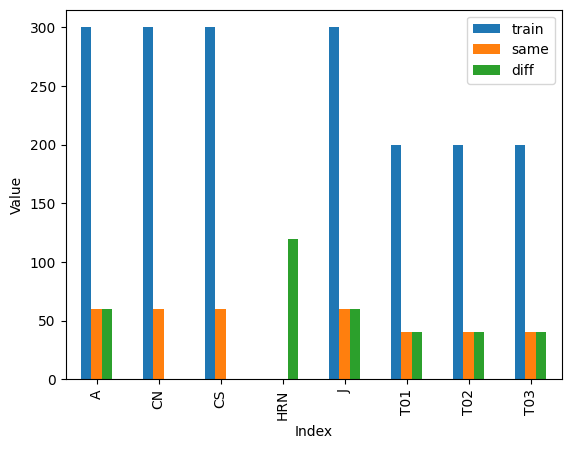

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(df_tot.values, index=df_tot.index.values, columns=['train','same','diff'])
df.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()

In [ ]:
# Count the number of different scenarios in train and tests

def count_scenarios(txt):
  df=pd.read_csv(txt, names=["scenario"])
  df['scenario'] = df['scenario'].str.split('_', n=1).str[1]
  scenario_counts = df['scenario'].value_counts()
  print(f"\nscenario counts for {txt}\n", scenario_counts)
  return scenario_counts

count_text = count_scenarios("train.txt")
count_same = count_scenarios("test_same_dom.txt")
count_scenarios("test_diff_dom.txt")

print("\n", set(count_text.keys()) == set(count_same.keys()))


scenario counts for train.txt
 T02_CN_A    50
T03_CS_A    50
T01_CN_J    50
T01_CS_J    50
T03_CN_A    50
T02_CS_A    50
T03_CS_J    50
T01_CN_A    50
T02_CN_J    50
T02_CS_J    50
T01_CS_A    50
T03_CN_J    50
Name: scenario, dtype: int64

scenario counts for test_same_dom.txt
 T02_CN_A    10
T03_CS_A    10
T01_CN_J    10
T01_CS_J    10
T03_CN_A    10
T02_CS_A    10
T03_CS_J    10
T01_CN_A    10
T02_CN_J    10
T02_CS_J    10
T01_CS_A    10
T03_CN_J    10
Name: scenario, dtype: int64

scenario counts for test_diff_dom.txt
 T03_HRN_J    20
T02_HRN_J    20
T01_HRN_J    20
T02_HRN_A    20
T03_HRN_A    20
T01_HRN_A    20
Name: scenario, dtype: int64

 True


Classes Distribution

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/MLDL-Project/Code/Codebase_inUse"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1qdeOmMzRTTZYag_nMfIYW1ptaZ_OpJwD/MLDL-Project/Code/Codebase_inUse


In [ ]:
from main import *

In [ ]:
#Retrieve the datasets

from torch.utils.data import ConcatDataset

train_transforms = sstr.Compose([ sstr.ToTensor() ])

valid_datasets = []
root = 'data/idda'

with open("data/GTAV+Cityscapes/data/GTA5/train.txt",'r') as f:
    list_samples = [line.rstrip('\n') for line in f]
train_dataset= GTAVDataset(root="data/GTAV+Cityscapes/data/GTA5",list_samples = list_samples,transform=train_transforms)

with open(os.path.join(root, 'train.json'), 'r') as f:
    all_data = json.load(f)

for client_id in all_data.keys():
    valid_datasets.append(IDDADataset(root=root, list_samples=all_data[client_id], transform=train_transforms,
                                      client_name=client_id))
valid_dataset = ConcatDataset(valid_datasets)
with open(os.path.join(root, 'test_same_dom.txt'), 'r') as f:
    test_same_dom_data = f.read().splitlines()
    test_same_dom_dataset = IDDADataset(root=root, list_samples=test_same_dom_data, transform=train_transforms,
                                        client_name='test_same_dom')
with open(os.path.join(root, 'test_diff_dom.txt'), 'r') as f:
    test_diff_dom_data = f.read().splitlines()
    test_diff_dom_dataset = IDDADataset(root=root, list_samples=test_diff_dom_data, transform=train_transforms,
                                        client_name='test_diff_dom')
test_datasets = [test_same_dom_dataset, test_diff_dom_dataset]

In [ ]:
from tqdm import tqdm
def retrieve_classes(dataset):
  class_freq = {}
  for _, label in tqdm(dataset):
    unique_classes, class_counts = torch.unique(label, return_counts=True)  # Get unique class labels and their counts in the label
    for cls, count in zip(unique_classes, class_counts):
      if cls.item() in class_freq:
        class_freq[cls.item()] += count.item()
      else:
        class_freq[cls.item()] = count.item()
  return class_freq

In [ ]:
print(train_dataset)
print()
print(valid_dataset)
print(valid_datasets[0])
print()
print(test_same_dom_dataset)
print()
print(test_diff_dom_dataset)

Dataset GTAVDataset
    Number of datapoints: 500
    Root location: data/GTAV+Cityscapes/data/GTA5
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Dataset IDDADataset
    Number of datapoints: 25
    Root location: data/idda
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Dataset IDDADataset
    Number of datapoints: 120
    Root location: data/idda
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Dataset IDDADataset
    Number of datapoints: 120
    Root location: data/idda
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
gta_freq = retrieve_classes(train_dataset)
IDDAtrain_freq = retrieve_classes(valid_dataset)
IDDAtest_same_freq = retrieve_classes(test_same_dom_dataset)
IDDAtest_diff_freq = retrieve_classes(test_diff_dom_dataset)

100%|██████████| 120/120 [00:28<00:00,  4.20it/s]


In [ ]:
value_to_name = {
    0 : "road",
    1 : 'sidewalk',
    2 : 'building',
    3 : 'wall',
    4 : 'fence',
    5 : 'pole',
    6 : 'traffic light',
    7 : 'traffic sign',
    8 : 'vegetation',
    9 : 'terrain',
    10 : 'sky',
    11 : 'person',
    12 : 'rider',
    13 : 'veichle',
    14 : 'motorcycle',
    15 : 'bicycle'
    #255 : 'Other'
}

In [ ]:
gta_norm = {key: value / len(train_dataset) for key, value in gta_freq.items()}
IDDAtrain_norm = {key: value / len(valid_dataset) for key, value in IDDAtrain_freq.items()}
IDDAtest_same_norm = {key: value / len(test_same_dom_dataset) for key, value in IDDAtest_same_freq.items()}
IDDAtest_diff_norm = {key: value / len(test_diff_dom_dataset) for key, value in IDDAtest_diff_freq.items()}

for cls in gta_freq.keys():
    print(f"Class {cls}: {gta_freq[cls]} -> {gta_norm[cls]}")

print(1920*1080)
print(sum(gta_norm.values()))

Class 0: 326894900 -> 653789.8
Class 1: 80823044 -> 161646.088
Class 2: 180212441 -> 360424.882
Class 5: 10673927 -> 21347.854
Class 6: 1293959 -> 2587.918
Class 8: 71220948 -> 142441.896
Class 9: 20381080 -> 40762.16
Class 10: 135393786 -> 270787.572
Class 11: 4094809 -> 8189.618
Class 12: 345511 -> 691.022
Class 13: 103076860 -> 206153.72
Class 14: 381632 -> 763.264
Class 255: 45301919 -> 90603.838
Class 3: 19158000 -> 38316.0
Class 4: 5648836 -> 11297.672
Class 7: 694601 -> 1389.202
Class 15: 30831 -> 61.662
2073600
2011254.168


                     GTAV     IDDA-train  IDDA-test_same  IDDA-test_diff
road           653789.800  540163.638333   532638.908333   538741.475000
sidewalk       161646.088  187889.568333   193234.466667   180090.625000
building       360424.882  327898.736667   318691.875000   327818.333333
wall            38316.000   40299.261667    45041.925000    57455.450000
fence           11297.672   10475.080000    10819.000000     9448.258333
pole            21347.854   18924.868333    18836.241667    17096.666667
traffic light    2587.918    2704.933333     3074.508333     2426.275000
traffic sign     1389.202     629.423333      355.858333     1397.866667
vegetation     142441.896  160131.043333   167448.750000   183146.541667
terrain         40762.160   24269.491667    22996.191667    29730.166667
sky            270787.572  516083.205000   503162.908333   469666.883333
person           8189.618    2611.506667     3195.116667     5277.183333
rider             691.022     966.715000      662.2

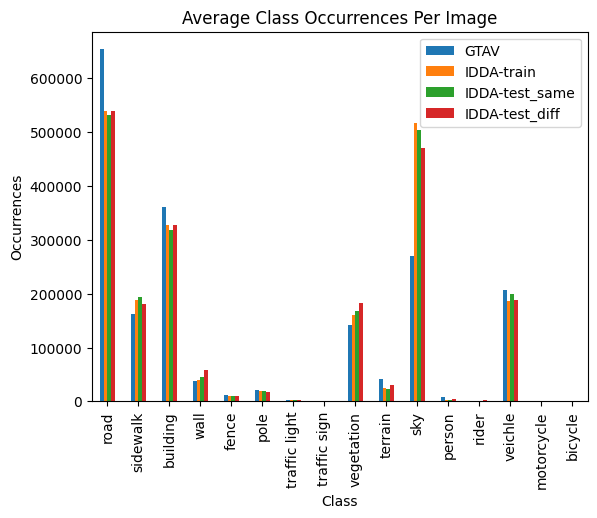

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

class_freq_dict = {
    'GTAV': gta_norm,
    'IDDA-train': IDDAtrain_norm,
    'IDDA-test_same': IDDAtest_same_norm,
    'IDDA-test_diff': IDDAtest_diff_norm
}

for class_freq in class_freq_dict.values():
    class_freq.pop(255, None)

df = pd.DataFrame(index=value_to_name.values())
for dataset_name, class_freq in class_freq_dict.items():
    series = pd.Series(class_freq).rename(value_to_name)
    df[dataset_name] = series

print(df)

#plt.figure(figsize=(20, 8))
df.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.title('Average Class Occurrences Per Image')
plt.xticks(rotation=90)
plt.show()

                     GTAV     IDDA-train  IDDA-test_same  IDDA-test_diff
road           653789.800  540163.638333   532638.908333   538741.475000
sidewalk       161646.088  187889.568333   193234.466667   180090.625000
building       360424.882  327898.736667   318691.875000   327818.333333
wall            38316.000   40299.261667    45041.925000    57455.450000
fence           11297.672   10475.080000    10819.000000     9448.258333
pole            21347.854   18924.868333    18836.241667    17096.666667
traffic light    2587.918    2704.933333     3074.508333     2426.275000
traffic sign     1389.202     629.423333      355.858333     1397.866667
vegetation     142441.896  160131.043333   167448.750000   183146.541667
terrain         40762.160   24269.491667    22996.191667    29730.166667
sky            270787.572  516083.205000   503162.908333   469666.883333
person           8189.618    2611.506667     3195.116667     5277.183333
rider             691.022     966.715000      662.2

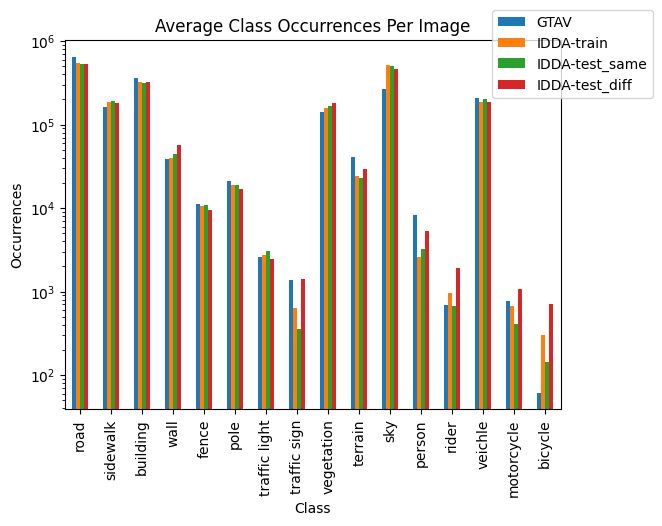

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

class_freq_dict = {
    'GTAV': gta_norm,
    'IDDA-train': IDDAtrain_norm,
    'IDDA-test_same': IDDAtest_same_norm,
    'IDDA-test_diff': IDDAtest_diff_norm
}

for class_freq in class_freq_dict.values():
    class_freq.pop(255, None)

df = pd.DataFrame(index=value_to_name.values())
for dataset_name, class_freq in class_freq_dict.items():
    series = pd.Series(class_freq).rename(value_to_name)
    df[dataset_name] = series

print(df)

#plt.figure(figsize=(20, 8))
df.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.title('Average Class Occurrences Per Image')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

                     GTAV     IDDA-train  IDDA-test_same  IDDA-test_diff
road           653789.800  540163.638333   532638.908333   538741.475000
sidewalk       161646.088  187889.568333   193234.466667   180090.625000
building       360424.882  327898.736667   318691.875000   327818.333333
wall            38316.000   40299.261667    45041.925000    57455.450000
fence           11297.672   10475.080000    10819.000000     9448.258333
pole            21347.854   18924.868333    18836.241667    17096.666667
traffic light    2587.918    2704.933333     3074.508333     2426.275000
traffic sign     1389.202     629.423333      355.858333     1397.866667
vegetation     142441.896  160131.043333   167448.750000   183146.541667
terrain         40762.160   24269.491667    22996.191667    29730.166667
sky            270787.572  516083.205000   503162.908333   469666.883333
person           8189.618    2611.506667     3195.116667     5277.183333
rider             691.022     966.715000      662.2

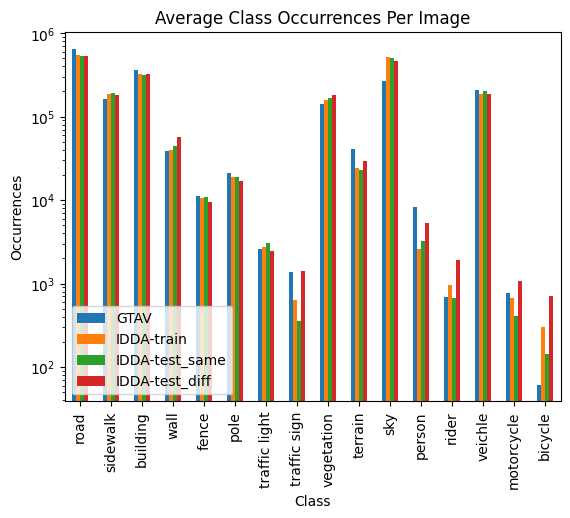

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

class_freq_dict = {
    'GTAV': gta_norm,
    'IDDA-train': IDDAtrain_norm,
    'IDDA-test_same': IDDAtest_same_norm,
    'IDDA-test_diff': IDDAtest_diff_norm
}

for class_freq in class_freq_dict.values():
    class_freq.pop(255, None)

df = pd.DataFrame(index=value_to_name.values())
for dataset_name, class_freq in class_freq_dict.items():
    series = pd.Series(class_freq).rename(value_to_name)
    df[dataset_name] = series

print(df)

#plt.figure(figsize=(20, 8))
df.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.title('Average Class Occurrences Per Image')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(loc='lower left')
plt.show()